<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0046/blob/main/01.E1-Exercicios-Maquinas-de-Turing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0046 - Teoria da Computação
# Máquinas de Turing
**Professor**: Paulo de Tarso Guerra ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))

In [9]:
# Execute essa célula (`ctrl+enter` ou clicando no botão de play) para importar a implementação das classes diretamente do [GitHub](https://github.com/paulotguerra/QXD0046)

![ -d teocomp ] || (git clone https://github.com/paulotguerra/QXD0046.git && cp -r QXD0046/teocomp . && rm -rf QXD0046)

from teocomp.automata import MT
from teocomp.utils.view import interactive

# Lista de Exercícios: Máquinas de Turing

1. Seja $M = (\{q,r,s,t,u,v,w\},\{0\},\{0,\mathtt{x},\sqcup\},\delta,q,\{v\})$ uma Máquina de Turing, onde

| $\delta$ |         $0$        |         $x$        |    $\sqcup$    |
|----------|--------------------|--------------------|----------------|
|   $q$    | $(r,  \sqcup  ,D)$ | $(w,\mathtt{x},D)$ | $(w,\sqcup,D)$ |
|   $r$    | $(s,\mathtt{x},D)$ | $(r,\mathtt{x},D)$ | $(v,\sqcup,D)$ |
|   $s$    | $(t,     0    ,D)$ | $(s,\mathtt{x},D)$ | $(u,\sqcup,E)$ |
|   $t$    | $(s,\mathtt{x},D)$ | $(t,\mathtt{x},D)$ | $(w,\sqcup,D)$ |
|   $u$    | $(u,     0    ,E)$ | $(u,\mathtt{x},E)$ | $(r,\sqcup,D)$ |

Dê a sequência de configurações nas quais $M$ entra quando iniciada sobre as cadeias:

a. 0\
b. 00\
c. 000\
d. 0000

In [10]:
item_1a = ["q0"]    # Inserir sequência de configurações
item_1b = ["q00"]   # Inserir sequência de configurações
item_1c = ["q000"]  # Inserir sequência de configurações
item_1d = ["q0000"] # Inserir sequência de configurações

2. Construa uma Máquina de Turing que reconhece a linguagem $\{a^ib^jc^k~|~i+j=k\text{ para }i,j,k > 0\}$.

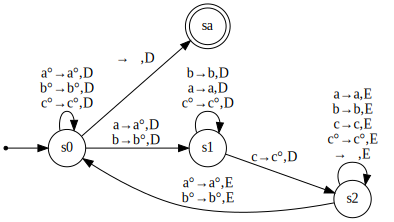

In [12]:
# Insira o código da máquina de Turing. (Ver exemplo a seguir.)

BLK,D,E = MT.default.values()

Q = {'s0','s1','s2'}
Sigma = {'a','b','c'}
Gamma = {'a°','b°','c°',BLK}
delta = {
    ('s0','a'):('s1','a°',D),
    ('s0','b'):('s1','b°',D),
    ('s0','a°'):('s0','a°',D),
    ('s0','b°'):('s0','b°',D),
    ('s0','c°'):('s0','c°',D),
    ('s0',BLK):('sa',BLK,D),
    ('s1','b'):('s1','b',D),
    ('s1','a'):('s1','a',D),
    ('s1','c'):('s2','c°',D),
    ('s1','c°'):('s1','c°',D),
    ('s2','a'):('s2','a',E),
    ('s2','b'):('s2','b',E),
    ('s2','a'):('s2','a',E),
    ('s2','c'):('s2','c',E),
    ('s2','c°'):('s2','c°',E),
    ('s2','a°'):('s0','a°',E),
    ('s2','b°'):('s0','b°',E),
    ('s2',BLK):('s2',BLK,E),
}
q0 = 's0'
F  = {'sa'}

M = MT(Q,Sigma,Gamma,delta,q0,F)
M

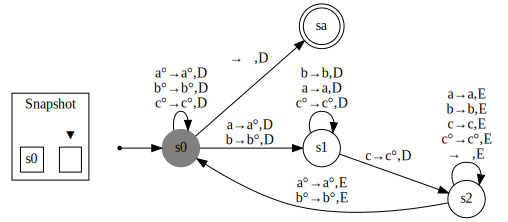

In [13]:
interactive(M)

3. Construa uma Máquina de Turing que reconhece a linguagem $\{a^ib^jc^k ~|~ i \neq j, j \neq k \text{ e } i \neq k \text{ para } i,j,k > 0\}$.

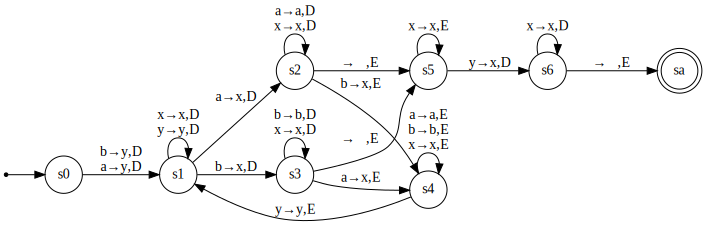

In [14]:
# Insira o código da máquina de Turing

BLK,D,E = MT.default.values()

Q = {'s0','s1','s2','s3','s4','s5'}
Sigma = {'a','b'}
Gamma = {'x','y',BLK}
delta = {
    ('s0','b'):('s1','y',D),
    ('s0','a'):('s1','y',D),
    ('s1','x'):('s1','x',D),
    ('s1','y'):('s1','y',D),
    ('s1','a'):('s2','x',D),
    ('s1','b'):('s1','x',D),
    ('s1','b'):('s3','x',D),
    ('s2','a'):('s2','a',D),
    ('s2','x'):('s2','x',D),
    ('s2','b'):('s4','x',E),
    ('s2',BLK):('s5',BLK,E),
    ('s3','b'):('s3','b',D),
    ('s3','x'):('s3','x',D),
    ('s3','a'):('s4','x',E),
    ('s3',BLK):('s5',BLK,E),
    ('s4','a'):('s4','a',E),
    ('s4','b'):('s4','b',E),
    ('s4','x'):('s4','x',E),
    ('s4','y'):('s1','y',E),
    ('s5','x'):('sa','x',D),
    ('s5','y'):('s6','x',D),
    ('s5','x'):('s5','x',E),
    ('s6','x'):('s6','x',D),
    ('s6',BLK):('sa',BLK,E)
}
q0 = 's0'
F  = {'sa'}

M = MT(Q,Sigma,Gamma,delta,q0,F)
M

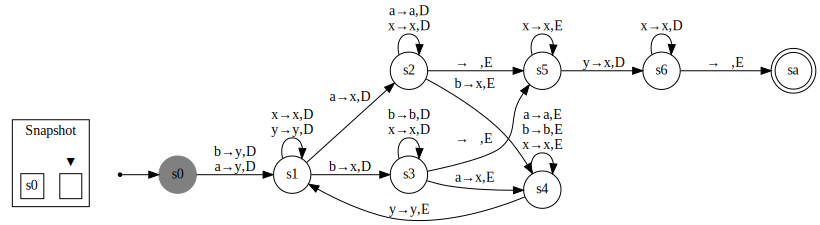

In [15]:
interactive(M)

4. Construa uma Máquina de Turing que reconhece a linguagem $\{w \in \{a,b\}^* ~|~ \text{ o número de } a\text{'s em } w \text{ é igual ao número de }b\text{'s} \}$.

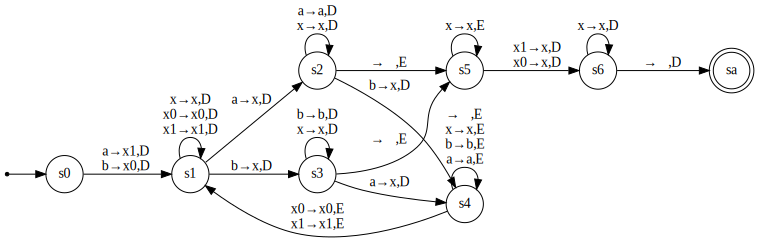

In [32]:
# Insira o código da máquina de Turing

BLK,D,E = MT.default.values()

Q = {'s0','s1','s2','s3','s4','s5','s6','sa'}
Sigma = {'a','b'}
Gamma = {'a','b','x',BLK}
delta = {
    ('s0','a'):('s1','x1',D),
    ('s0','b'):('s1','x0',D),
    ('s1','x'):('s1','x',D),
    ('s1','x0'):('s1','x0',D),
    ('s1','x1'):('s1','x1',D),
    ('s1','a'):('s2','x',D),
    ('s1','b'):('s3','x',D),
    ('s2','a'):('s2','a',D),
    ('s2','x'):('s2','x',D),
    ('s2','b'):('s4','x',D),
    ('s2',BLK):('s5',BLK,E),
    ('s3','a'):('s4','x',D),
    ('s3','b'):('s3','b',D),
    ('s3','x'):('s3','x',D),
    ('s3',BLK):('s5',BLK,E),
    ('s4','x0'):('s1','x0',E),
    ('s4','x1'):('s1','x1',E),
    ('s4',BLK):('s4',BLK,E),
    ('s4','x'):('s4','x',E),
    ('s4','b'):('s4','b',E),
    ('s4','a'):('s4','a',E),
    ('s5','x'):('s5','x',E),
    ('s5','x1'):('s6','x',D),
    ('s5','x0'):('s6','x',D),
    ('s6','x'):('s6','x',D),
    ('s6',BLK):('sa',BLK,D),
}
q0 = 's0'
F  = {'sa'}

M = MT(Q,Sigma,Gamma,delta,q0,F)
M

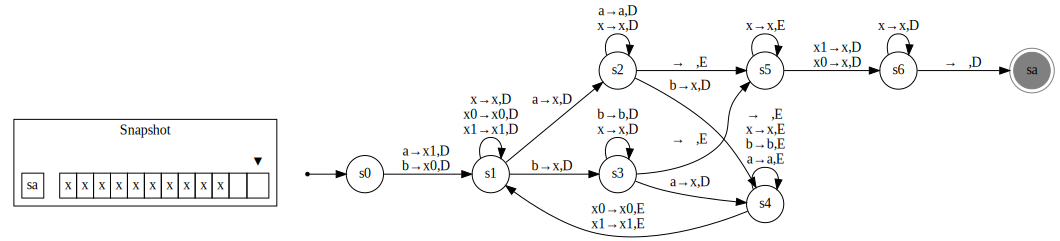

In [33]:
interactive(M)

5. Construa uma Máquina de Turing que reconhece a linguagem $\{w \in \{a,b\}^* ~|~ \text{ o número de } a\text{'s em } w \text{ é o dobro do número de }b\text{'s} \}$.

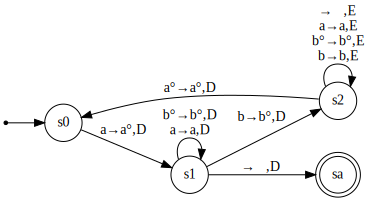

In [ ]:
# Insira o código da máquina de Turing

BLK,D,E = MT.default.values()

Q = {'s0','s1','s2','sa'}
Sigma = {'a','b'}
Gamma = {'a','b','a°','b°',BLK}
delta = {
    ('s0','a'):('s1','a°',D),
    ('s1','b°'):('s1','b°',D),
    ('s1','a'):('s1','a',D),
    ('s1','b'):('s2','b°',D),
    ('s2',BLK):('s2',BLK,E),
    ('s2','a'):('s2','a',E),
    ('s2','b°'):('s2','b°',E),
    ('s2','a°'):('s0','a°',D),
    ('s2','b'):('s2','b',E),
    ('s1',BLK):('sa',BLK,D)
}
q0 = 's0'
F  = {'sa'}

M = MT(Q,Sigma,Gamma,delta,q0,F)
M

6. Construa uma Máquina de Turing que reconhece a linguagem $\{w \in \{a,b\}^* ~|~ \text{ o número de } a\text{'s em } w \text{ é menor que o número de }b\text{'s} \}$.

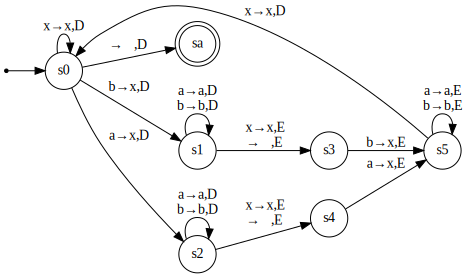

In [48]:
# Insira o código da máquina de Turing

BLK,D,E = MT.default.values()

Q = {'s0','s1','s2','s5','sa'}
Sigma = {'a','b'}
Gamma = {'a','b','a°','b°',BLK}
delta = {
    ('s0','a'):('s2','x',D),
    ('s0','b'):('s1','x',D),
    ('s0','x'):('s0','x',D),
    ('s0',BLK):('sa',BLK,D),
    ('s1','a'):('s1','a',D),
    ('s1','b'):('s1','b',D),
    ('s1','x'):('s3','x',E),
    ('s1',BLK):('s3',BLK,E),
    ('s2','a'):('s2','a',D),
    ('s2','b'):('s2','b',D),
    ('s2','x'):('s4','x',E),
    ('s2',BLK):('s4',BLK,E),
    ('s3','b'):('s5','x',E),
    ('s4','a'):('s5','x',E),
    ('s5','a'):('s5','a',E),
    ('s5','b'):('s5','b',E),
    ('s5','x'):('s0','x',D),
}
q0 = 's0'
F  = {'sa'}

M = MT(Q,Sigma,Gamma,delta,q0,F)
M

7. Construa uma Máquina de Turing que reconhece a linguagem $\{w \in \{a,b\}^* ~|~ w \text{ é um palíndromo que contém o mesmo número de }a\text{'s e }b\text{'s}\}$.

In [ ]:
interactive(M)

In [ ]:
# Insira o código da máquina de Turing


8. Dê um diagrama de estados de Máquinas de Turing que implemente as seguinte subrotinas, em todos os casos o alfabeto de fita é $\Gamma = \{a,b,\#,\sqcup\}$.

* **LIMPAR**: limpa o trecho de fita entre a posição atual e a posição mais a esquerda da fita.

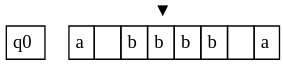

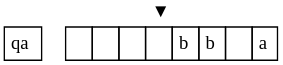

In [ ]:
# Insira o código da máquina de Turing

* **PROJ-2**: move a cabeça de leitura para o segundo \# após a posição atual.

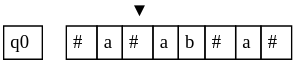

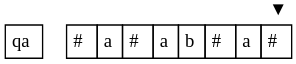

In [ ]:
# Insira o código da máquina de Turing

* **SHIFT-R**: desloca a cadeia iniciada na posição atual uma posição para a direita

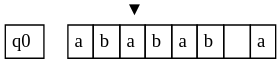

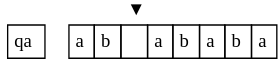

In [ ]:
# Insira o código da máquina de Turing

* **SHIFT-L**: desloca a cadeia iniciada na posição atual uma posição para a esquerda

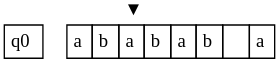

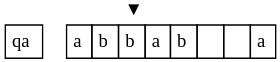

In [ ]:
# Insira o código da máquina de Turing

* **COPIA-D**: copia a subcadeia indicada por delimitadores \#.

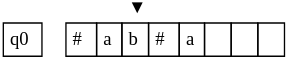

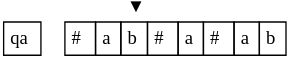

In [ ]:
# Insira o código da máquina de Turing